# Customer Preference Analysis

### step 1: importing libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### step 2: loading the dataset

In [ ]:
df= pd.read_csv(r'C:\machine-learning\cognifyz-internship\Dataset .csv')

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
print("Dataset shape:", df.shape)

Dataset shape: (9551, 21)


### step 3: handling missing values

In [6]:
print("\nMissing values per column:")
df.isnull().sum()



Missing values per column:


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
df.dropna(inplace=True)
print("\nDataset shape after dropping missing values:", df.shape)


Dataset shape after dropping missing values: (9542, 21)


### step 4:analyzing relationship between cuisine and restaurant's rating

In [8]:
df_exploded = df.assign(Cuisines=df['Cuisines'].str.split(', ')).explode('Cuisines')

In [9]:
cuisine_stats = df_exploded.groupby('Cuisines').agg({
    'Aggregate rating': ['mean', 'count'],
    'Votes': 'sum'
}).reset_index()

In [59]:
cuisine_stats.columns = ['Cuisine', 'Average Rating', 'Rating Count', 'Total Votes']
cuisine_stats

,Cuisine,Average Rating,Rating Count,Total Votes
0,Afghani,1.971429,14,811
1,African,3.525000,8,5020
2,American,3.661538,390,183117
3,Andhra,3.870000,10,5946
4,Arabian,3.385714,28,6150
...,...,...,...,...
140,Turkish Pizza,4.325000,8,988
141,Vegetarian,4.073913,23,10714
142,Vietnamese,3.923810,21,5120
143,Western,4.140000,10,4749


In [60]:
# Filter for cuisines with at least 20 ratings
filtered_stats = cuisine_stats[cuisine_stats['Rating Count'] >= 20]
filtered_stats

,Cuisine,Average Rating,Rating Count,Total Votes
2,American,3.661538,390,183117
4,Arabian,3.385714,28,6150
7,Asian,3.815021,233,104303
12,BBQ,3.903030,33,9647
13,Bakery,2.440940,745,57696
14,Bar Food,3.933333,39,15684
16,Bengali,3.006897,29,7883
17,Beverages,2.740175,229,21037
19,Biryani,2.420339,177,18614
20,Brazilian,3.567857,28,3259


### step 5: identifying most popular cuisines based on ratings

In [62]:
# Top 10 cuisines by average rating
top_rated = filtered_stats.sort_values(by='Average Rating', ascending=False).head(10)
top_rated

,Cuisine,Average Rating,Rating Count,Total Votes
67,International,4.247619,21,8122
124,Southern,4.129167,24,13939
141,Vegetarian,4.073913,23,10714
116,Sandwich,4.066038,53,23500
59,Grill,4.057143,21,4301
128,Steak,3.985484,62,25677
131,Sushi,3.973333,75,20582
56,Goan,3.970000,20,11488
21,Breakfast,3.965854,41,16097
87,Mediterranean,3.948214,112,80538


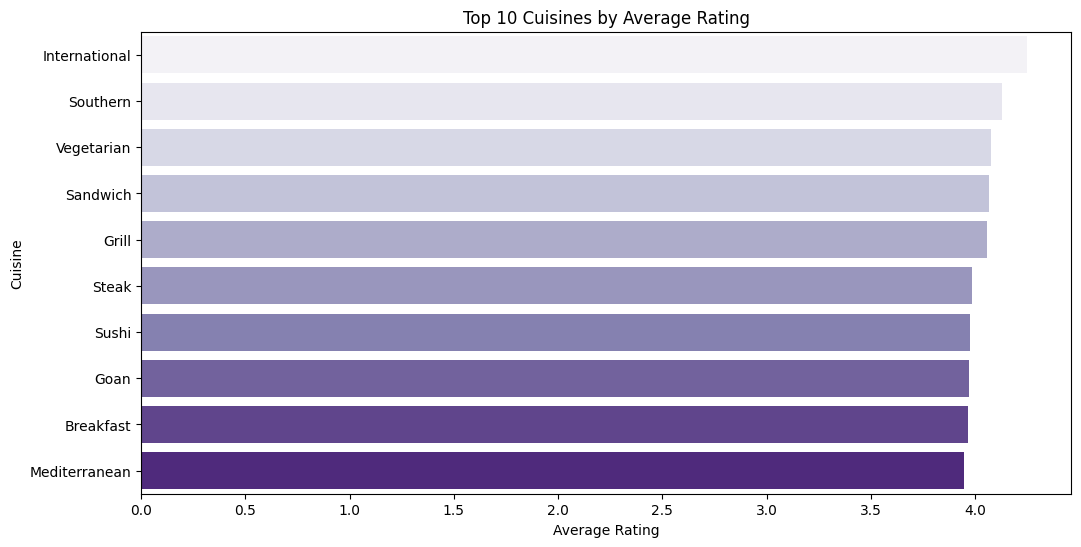

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Average Rating', y='Cuisine', data=top_rated, palette='Purples', hue = 'Cuisine', legend=False)
plt.title("Top 10 Cuisines by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Cuisine")
plt.show()

### step 6: identifying most popular cuisines based on votes

In [63]:
# Top 10 cuisines by total votes
top_votes = filtered_stats.sort_values(by='Total Votes', ascending=False).head(10)
top_votes

,Cuisine,Average Rating,Rating Count,Total Votes
100,North Indian,2.510455,3960,595981
34,Chinese,2.621024,2735,364351
70,Italian,3.562042,764,329265
37,Continental,3.518750,736,288255
49,Fast Food,2.563092,1986,184058
2,American,3.661538,390,183117
27,Cafe,3.321195,703,177568
95,Mughlai,2.609950,995,151946
42,Desserts,2.978867,653,105889
7,Asian,3.815021,233,104303


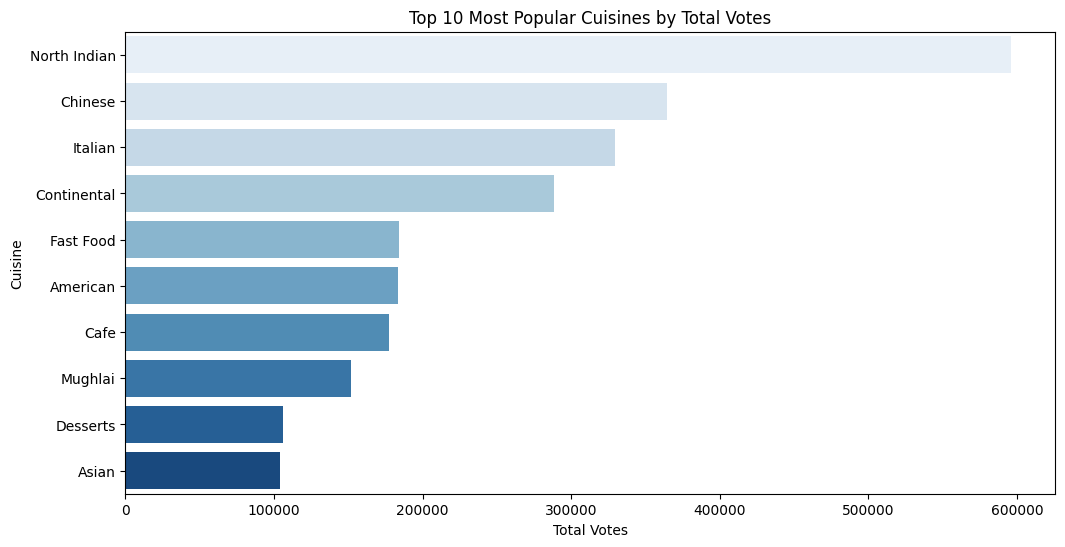

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Votes', y='Cuisine', data=top_votes, palette='Blues', hue = 'Cuisine', legend=False)
plt.title("Top 10 Most Popular Cuisines by Total Votes")
plt.xlabel("Total Votes")
plt.ylabel("Cuisine")
plt.show()

### step 7: identifying the Top-rated and popular cuisine

In [64]:
# Balanced cuisines: High rating + high votes
balanced = filtered_stats.sort_values(by=['Average Rating', 'Total Votes'], ascending=False).head(10)
balanced

,Cuisine,Average Rating,Rating Count,Total Votes
67,International,4.247619,21,8122
124,Southern,4.129167,24,13939
141,Vegetarian,4.073913,23,10714
116,Sandwich,4.066038,53,23500
59,Grill,4.057143,21,4301
128,Steak,3.985484,62,25677
131,Sushi,3.973333,75,20582
56,Goan,3.970000,20,11488
21,Breakfast,3.965854,41,16097
87,Mediterranean,3.948214,112,80538


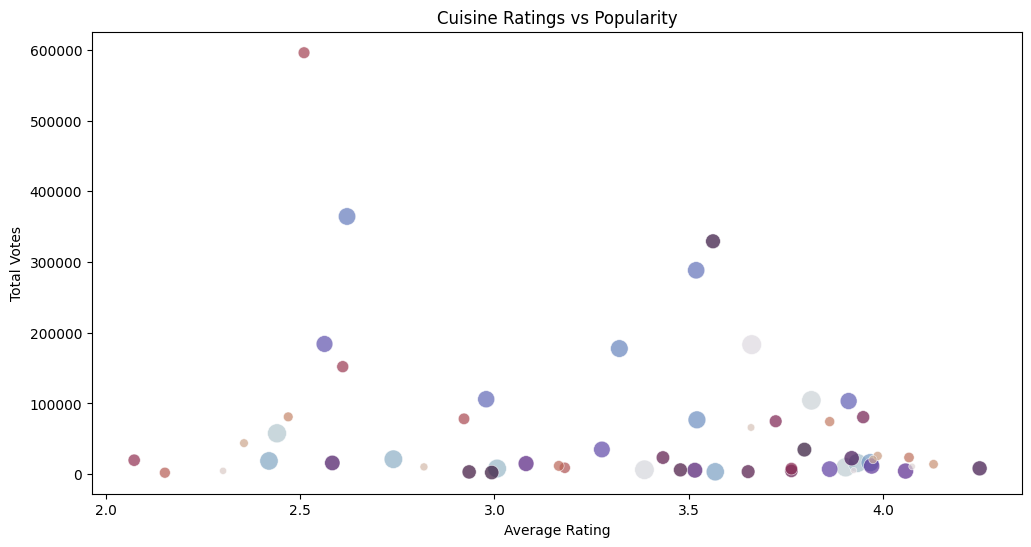

In [58]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_stats, x='Average Rating', y='Total Votes', palette='twilight', hue='Cuisine', legend=False,size='Cuisine', sizes=(20, 200), alpha=0.7)
plt.title("Cuisine Ratings vs Popularity")
plt.xlabel("Average Rating")
plt.ylabel("Total Votes")
plt.show()

### end of task 2: level 3